# Task-3 Car Price Prediction Using Machine Learning 


The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
# importing necessary libaries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error


### Loading the dataset

In [2]:
pd.set_option('display.max_columns', None)

dataset=pd.read_csv("CarPrice_Assignment.csv")

dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We have been provided a file named **Data Dictionary- carprices** explaining the meaning of the variables we are going to work in.

Here our target variable is Car Price

In [3]:
dataset.drop('car_ID',axis=1,inplace=True)

In [4]:
dataset.shape

(205, 25)

In [5]:
dataset.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### EDA

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
dataset.nunique().to_frame("No of Unique Values ")

,No of Unique Values
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53
carlength,75


In [9]:
# skewness tells us about the about the direction of outliers. skew=0 indicate normal distribution

dataset.skew(numeric_only=True)

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [10]:
# checking how the numerical variables are impacting our target variable

correlation = dataset.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [11]:
#  different types of car type 

dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Analyzing the categorical data in our dataset

In [12]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


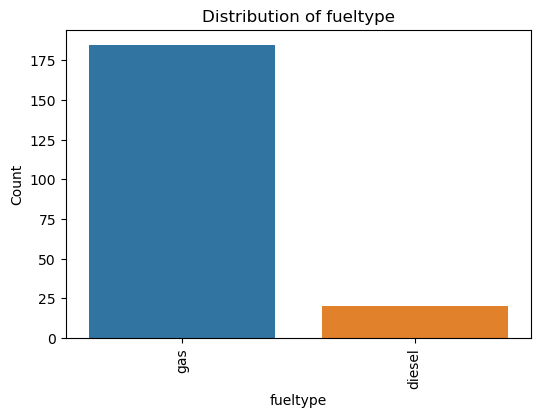

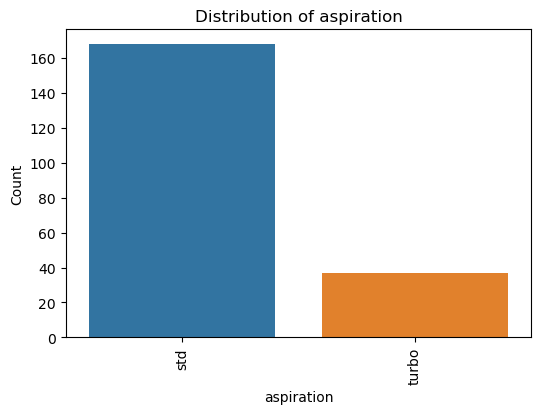

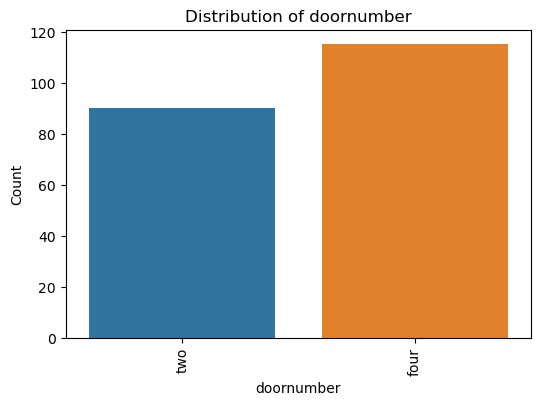

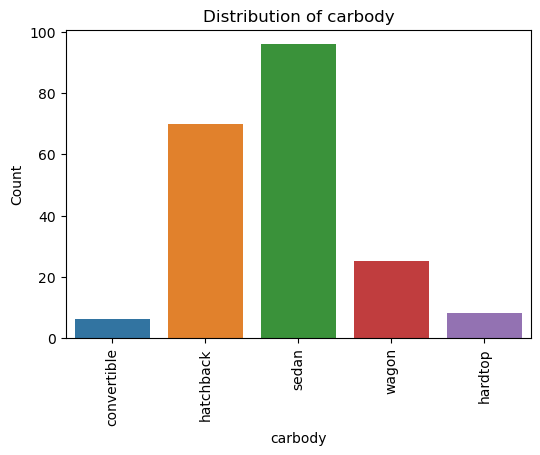

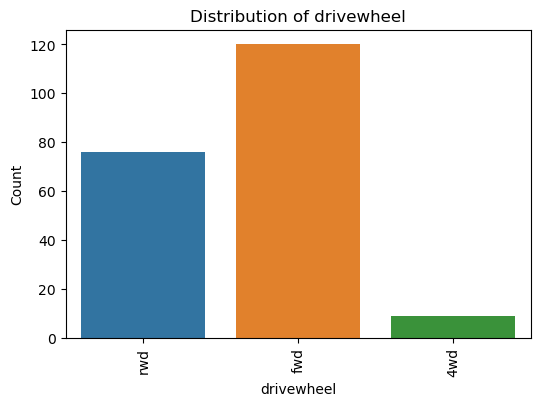

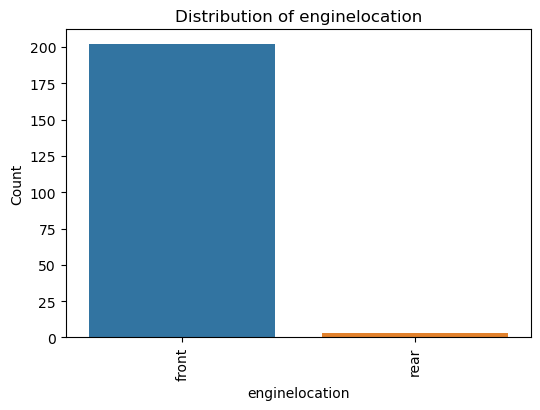

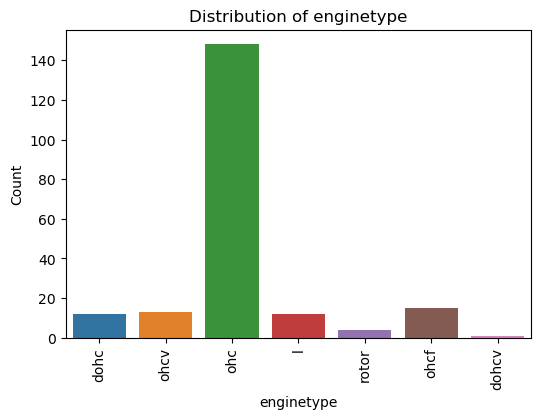

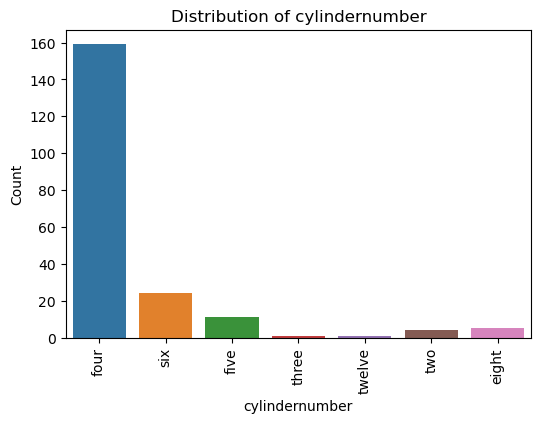

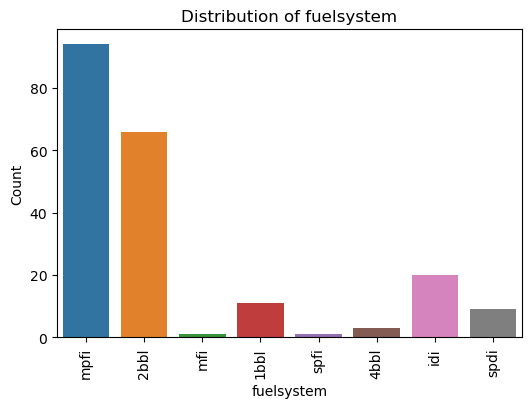

In [13]:

# List of categorical columns (ignoring the carname)
categorical_columns2 = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Loop through each categorical column and create count plot
for column in categorical_columns2:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=dataset, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


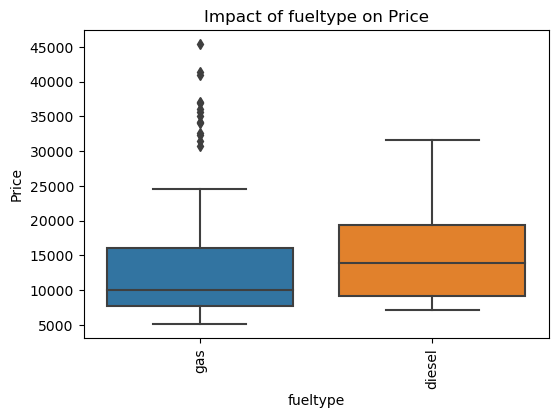

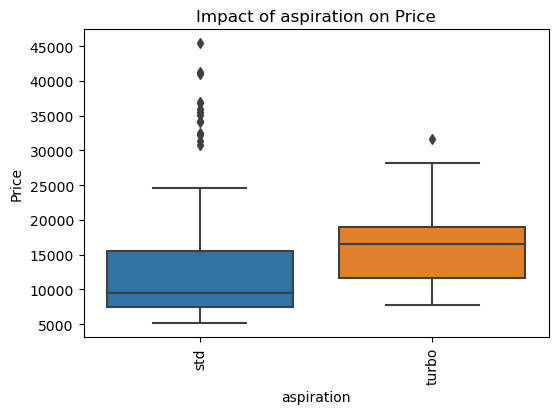

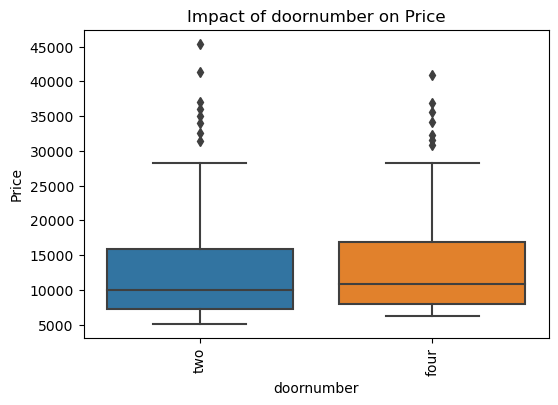

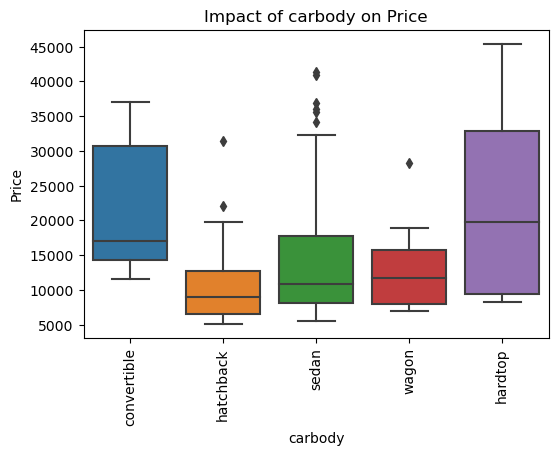

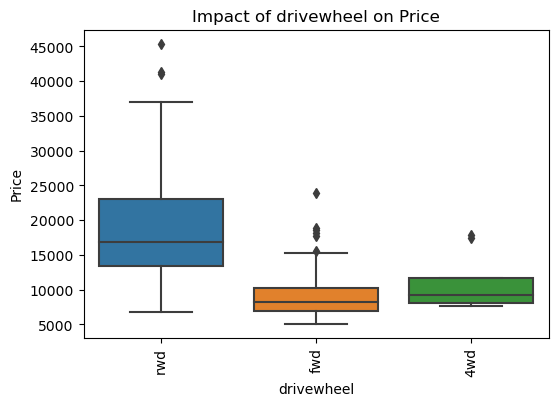

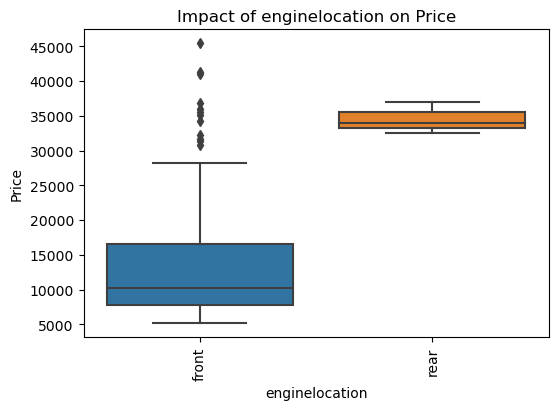

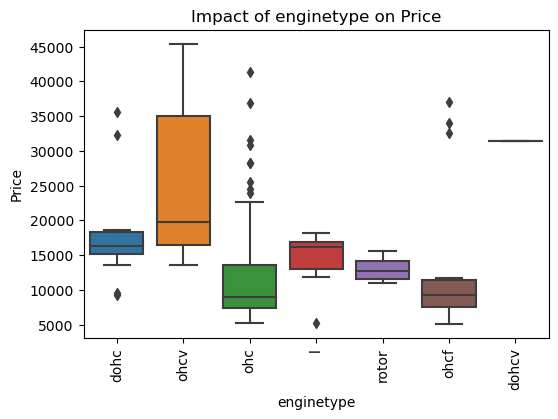

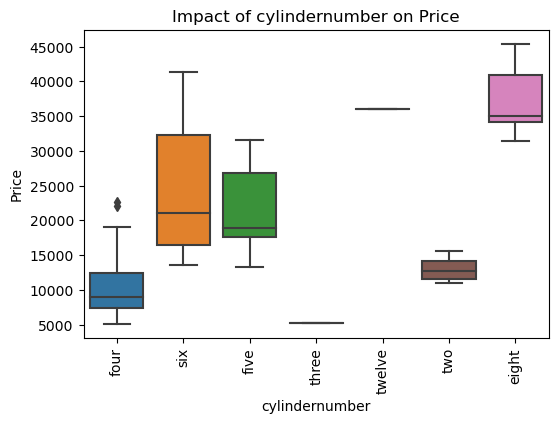

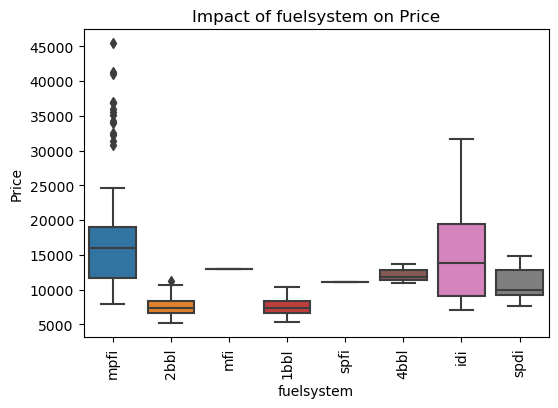

In [14]:
# List of categorical columns
categorical_columns2 = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Loop through each categorical column and creating box plot

for column in categorical_columns2:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataset, x=column, y='price')
    plt.title(f"Impact of {column} on Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.xticks(rotation=90)
    plt.show()

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['CarName','fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through each categorical column and encode them
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the updated dataset with encoded categorical columns
pd.set_option('display.max_columns', None)  # Display all rows without truncation
dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


Univariate analysis of numerical dataset

### Analyzing the numerical data in our dataset

In [16]:
numerical_columns = dataset.select_dtypes(include=['int', 'float']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

Numerical Columns:
 ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


<Figure size 600x400 with 0 Axes>

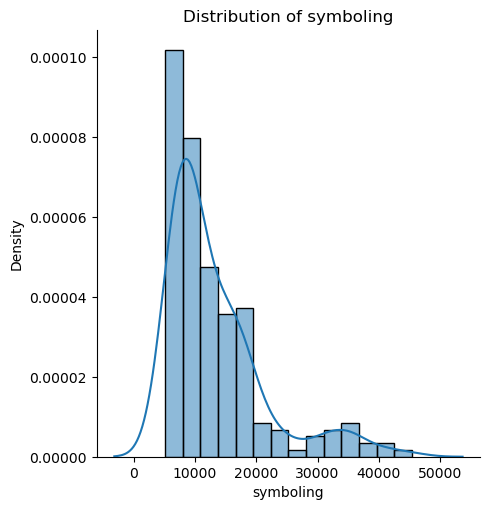

<Figure size 600x400 with 0 Axes>

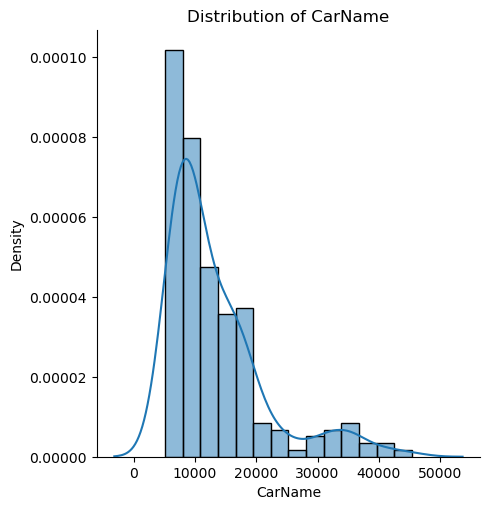

<Figure size 600x400 with 0 Axes>

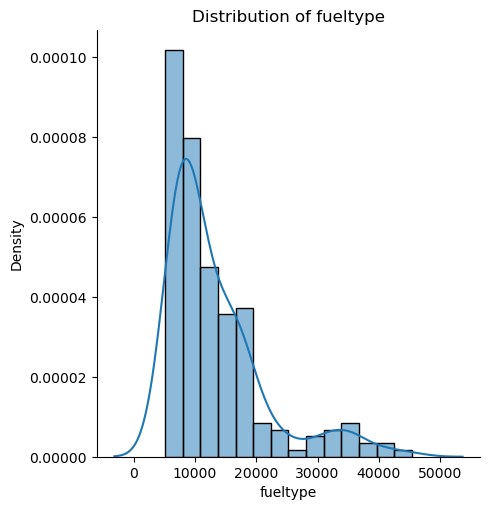

<Figure size 600x400 with 0 Axes>

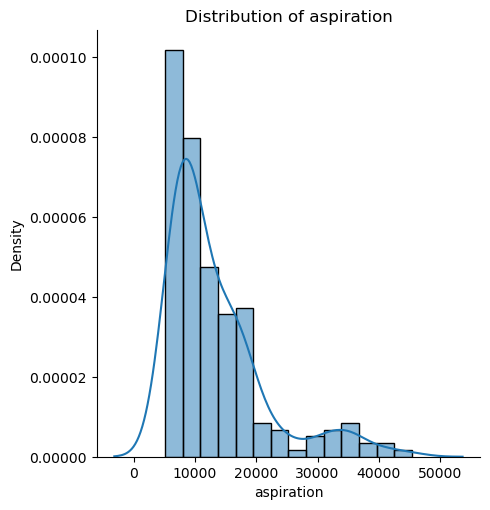

<Figure size 600x400 with 0 Axes>

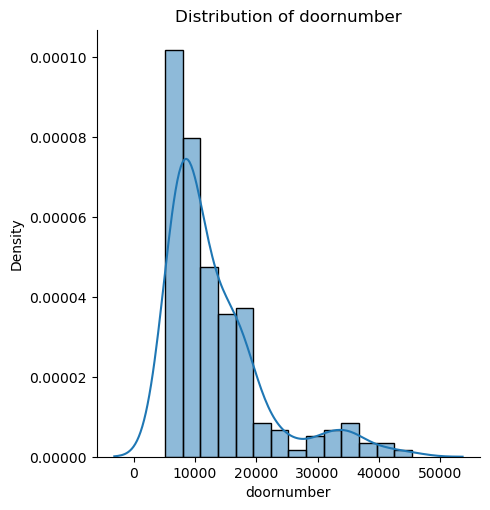

<Figure size 600x400 with 0 Axes>

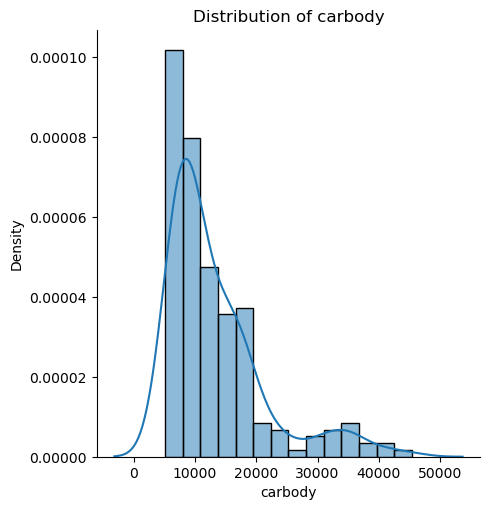

<Figure size 600x400 with 0 Axes>

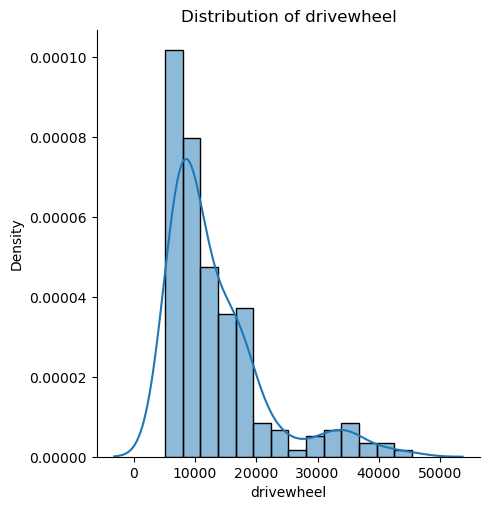

<Figure size 600x400 with 0 Axes>

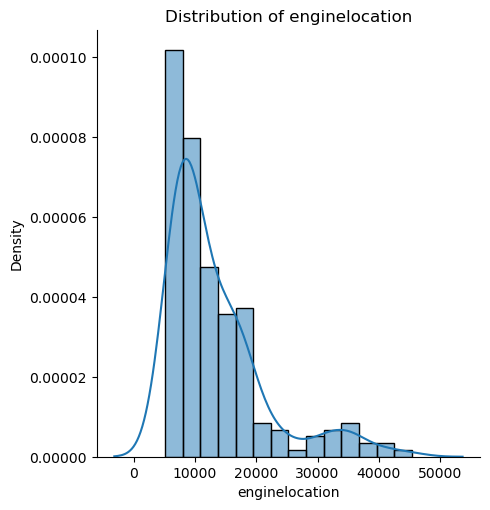

<Figure size 600x400 with 0 Axes>

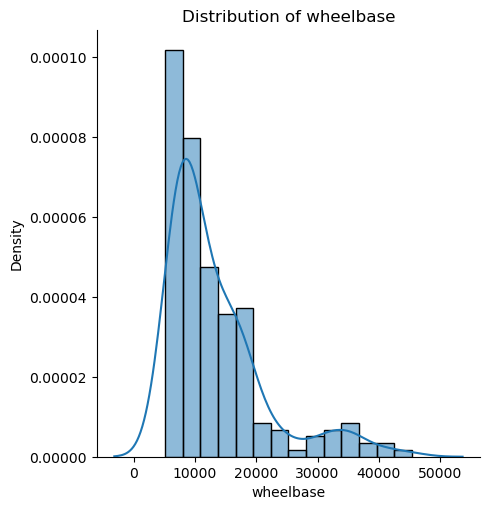

<Figure size 600x400 with 0 Axes>

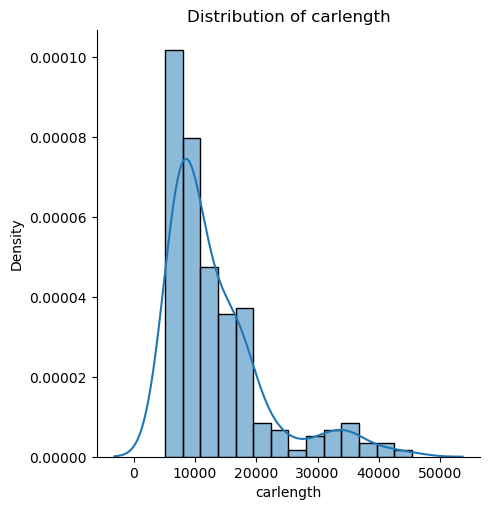

<Figure size 600x400 with 0 Axes>

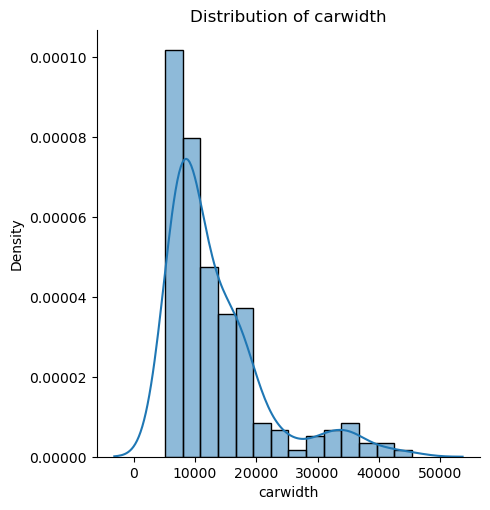

<Figure size 600x400 with 0 Axes>

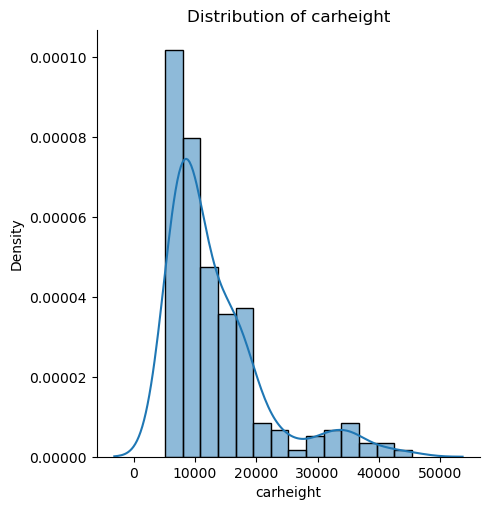

<Figure size 600x400 with 0 Axes>

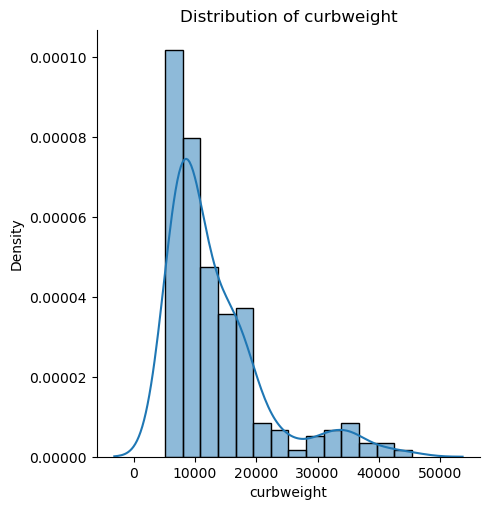

<Figure size 600x400 with 0 Axes>

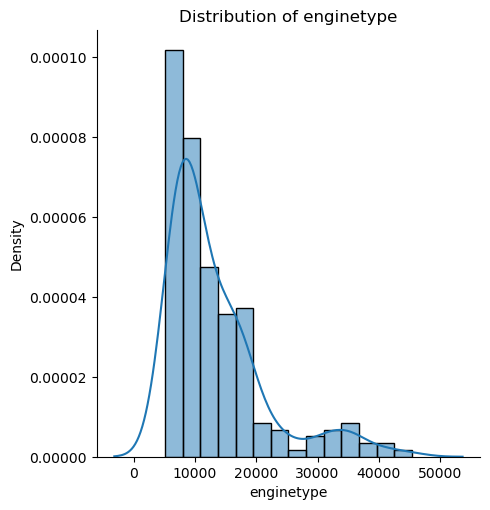

<Figure size 600x400 with 0 Axes>

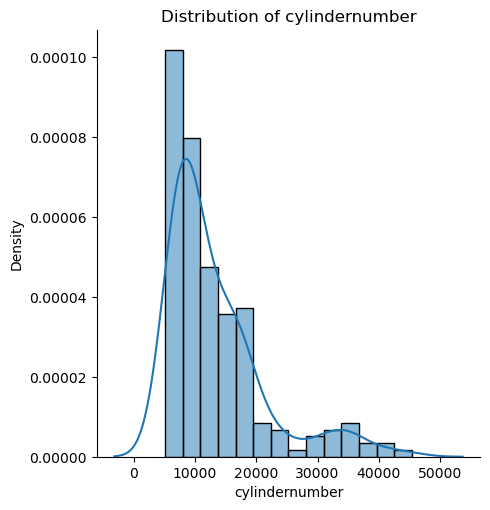

<Figure size 600x400 with 0 Axes>

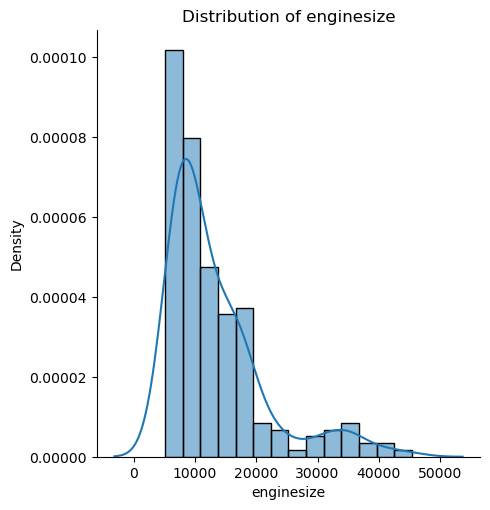

<Figure size 600x400 with 0 Axes>

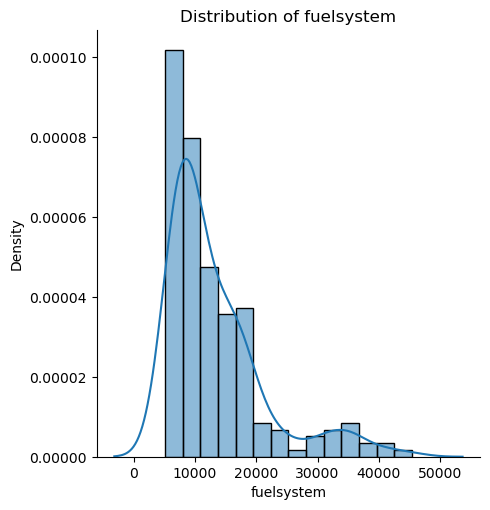

<Figure size 600x400 with 0 Axes>

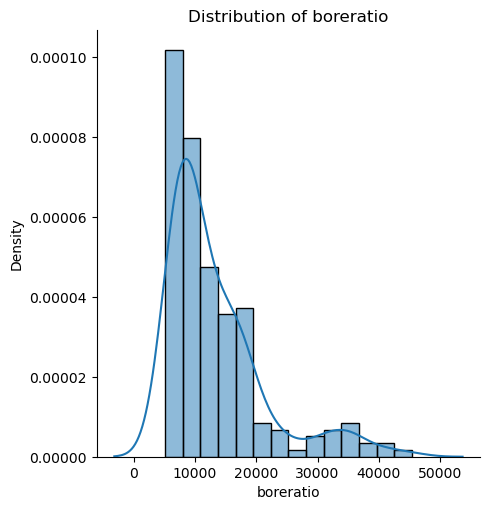

<Figure size 600x400 with 0 Axes>

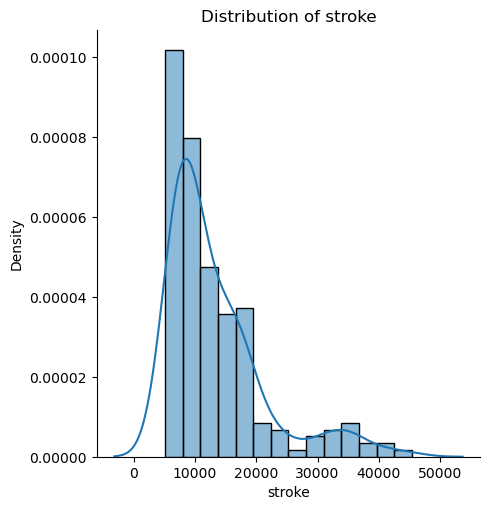

<Figure size 600x400 with 0 Axes>

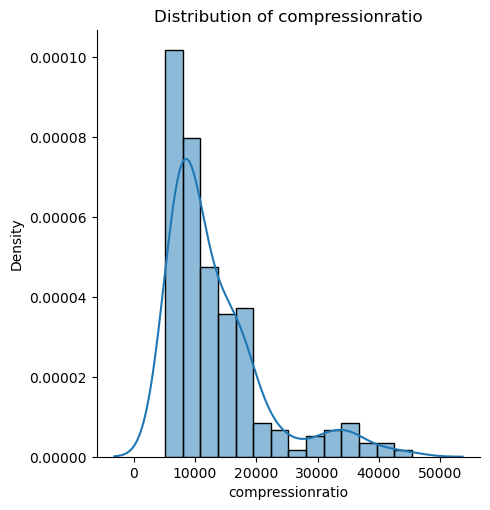

<Figure size 600x400 with 0 Axes>

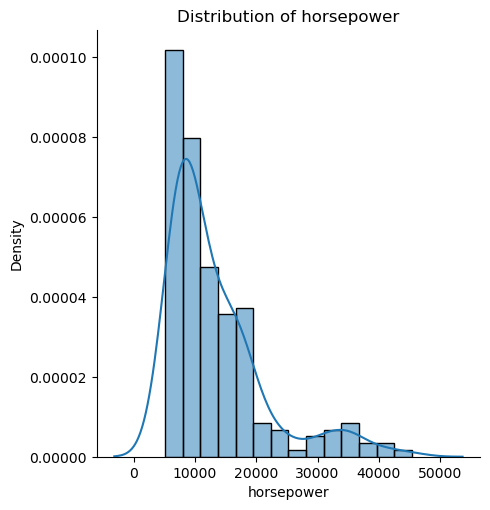

<Figure size 600x400 with 0 Axes>

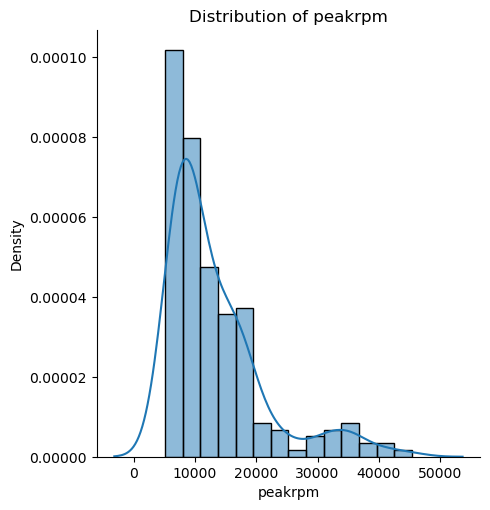

<Figure size 600x400 with 0 Axes>

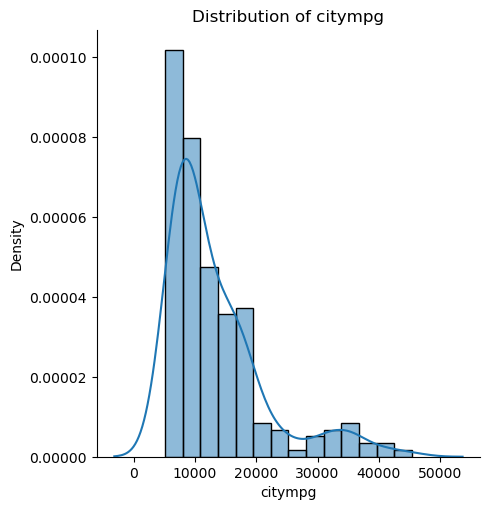

<Figure size 600x400 with 0 Axes>

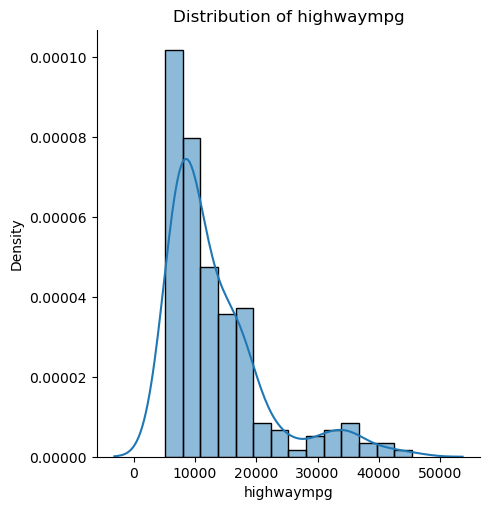

<Figure size 600x400 with 0 Axes>

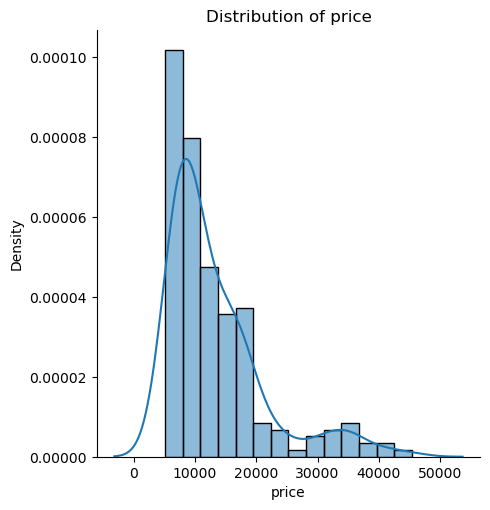

In [17]:

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.displot(dataset['price'], kde=True,stat='density',kde_kws=dict(cut=3))
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()


In [18]:
# checking again the correlation all the variables after label encoding

correlation = dataset.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
enginetype          0.049171
cylindernumber     -0.027628
doornumber         -0.031835
symboling          -0.079978
carbody            -0.083976
peakrpm            -0.085267
fueltype           -0.105679
CarName            -0.231439
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


### Correlation matrix 

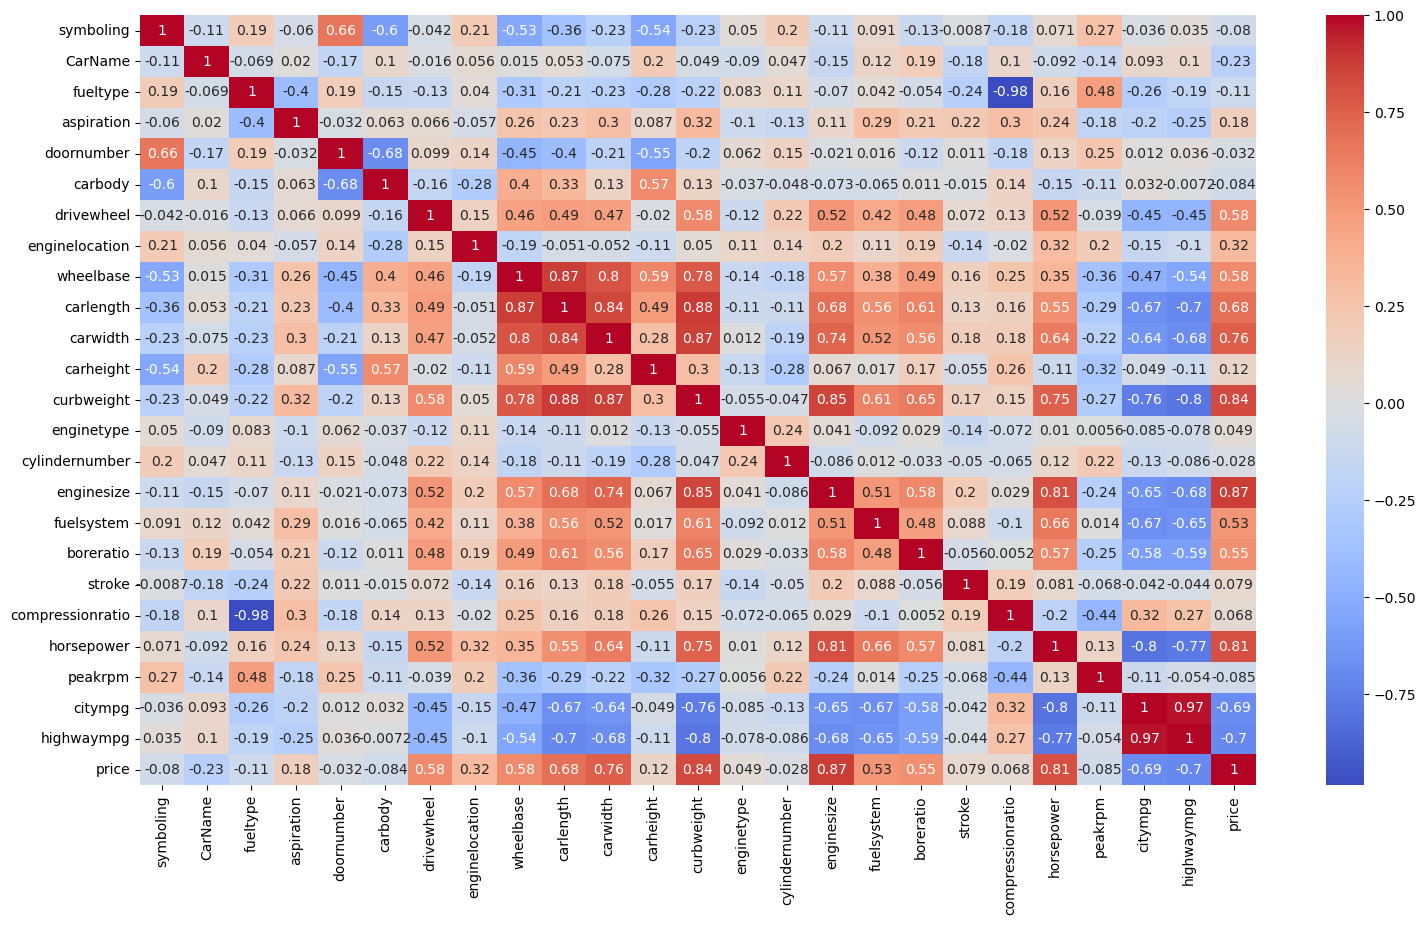

In [19]:
#  plotting the correlation matrix to see how each variable is impacting others

plt.figure(figsize=(18,10))
sns.heatmap(dataset.corr(), annot=True,cmap='coolwarm')
plt.show()

In [20]:
dataset.shape

(205, 25)

### Splitting our dataset into Training and Testing

In [21]:

X=dataset.iloc[:,:24].values    # all the features except the target variable
Y=dataset.iloc[:,-1].values    # only the target variable


In [22]:
print(X)

[[ 3.00e+00  2.00e+00  1.00e+00 ...  5.00e+03  2.10e+01  2.70e+01]
 [ 3.00e+00  3.00e+00  1.00e+00 ...  5.00e+03  2.10e+01  2.70e+01]
 [ 1.00e+00  1.00e+00  1.00e+00 ...  5.00e+03  1.90e+01  2.60e+01]
 ...
 [-1.00e+00  1.40e+02  1.00e+00 ...  5.50e+03  1.80e+01  2.30e+01]
 [-1.00e+00  1.42e+02  0.00e+00 ...  4.80e+03  2.60e+01  2.70e+01]
 [-1.00e+00  1.43e+02  1.00e+00 ...  5.40e+03  1.90e+01  2.50e+01]]


In [23]:
print(Y)

[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.    25552.    28248.    28176.
 31600.    34184.    35056.    40960.    45400.    16503.     5389.
  6189.     6669.     7689.     9959.     8499.    12629.    14869.
 14489.     6989.     8189.     9279.     9279.     5499.     7099.
  6649.     6849.     7349.     7299.     7799.     7499.     7999.
  8249.     8949.     9549.    13499.    14399. 

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2,random_state=42)

### Linear Regression

In [25]:
#  this is an multiple linear regression

from sklearn.linear_model import LinearRegression
 
lr= LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [26]:
# making prediction based on the test data

y_pred=lr.predict(x_test)
y_pred

array([25653.10322076, 17598.74148461,  9669.27654345, 13535.57665124,
       26527.85617514,  6322.55589502,  8498.34641517,  5774.02823388,
        9519.7586162 ,  6903.1887775 , 13803.98729703,  5950.7499891 ,
       16679.67101398, 10432.80769795, 40132.97143166,  6600.22005442,
         -50.81104432, 14365.95782137,  9648.47563341, 10453.46229641,
       11102.56580569, 21056.21805417,  7948.16420041,  3235.15701746,
        7717.61022734, 24445.86380165, 14023.91307823, 15818.12775588,
        5249.28332054, 16195.39806549, 26548.75947711,  7090.56452652,
        4526.14782278, 22076.94891349,  8251.77885968, 26788.87986187,
       10066.02430772,  9770.22115645,  6831.1540548 , 14660.50118738,
        7435.45461509])

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred).round(4)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(4)
r2 = r2_score(y_test, y_pred).round(4)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 2136.7805
Root Mean Squared Error: 3546.1558
R-squared: 0.8407



Mean Absolute Error (MAE): measures the average absolute difference between the predicted and actual values.  The MAE of 2136.7805 indicates that, on average, the predictions of our model are off by around 2136.78.

Root Mean Squared Error (RMSE): is a measure of the standard deviation of the residuals (differences between predicted and actual values).RMSE is sensitive to outliers and penalizes larger errors more heavily than smaller errors.

R-squared (R²): R² measures the proportion of the variance in the dependent variable (car prices) that is explained by the independent variables (features) in the model.
An R² of 0.8407 suggests that approximately 84.07% of the variability in car prices can be explained by the linear regression model.

### Random forest Regressor (using hyperparameter tuning)

In [28]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 10, 20, 30],
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=42)

# Create the GridSearchCV instance
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the model with GridSearch
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.8945351997796305


In [29]:
# Create a RandomForestRegressor  with the best parameters
best_rf = RandomForestRegressor(max_depth=None, n_estimators=100, random_state=42)

# Train the model on the entire training data
best_rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test data
y_pred = best_rf.predict(x_test)

r2 = r2_score(y_test, y_pred).round(4)

# Calculate RMSE on the test data
rmse = mean_squared_error(y_test, y_pred, squared=False).round(4)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R2): 0.9554
Root Mean Squared Error (RMSE): 1876.759


### XGBoost Regressor 

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an instance of XGBRegressor
xgb = XGBRegressor(random_state=42)

# Create the GridSearchCV instance
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the model with GridSearch
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.9079572671051717


In [32]:

# Define the best parameters found from the hyperparameter tuning
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8
}

# unpacking the best parameter from the dictionary using **
best_xgb = XGBRegressor(**best_params, random_state=42)

best_xgb.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_xgb = best_xgb.predict(x_test)

r2_xgb = r2_score(y_test, y_pred_xgb).round(4)
print("(R2) Score  :", r2_xgb)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False).round(4)
print("Root Mean Squared Error(RMSE) :", rmse_xgb)

(R2) Score  : 0.9311
Root Mean Squared Error(RMSE) : 2331.3922


#### Out of all the models used Random forest regressor performs best having a R^2 value of 0.9554